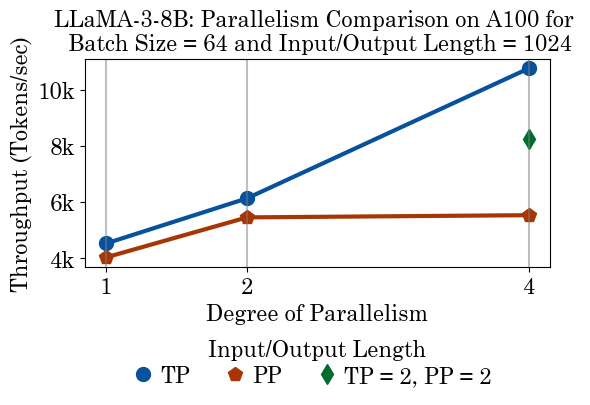

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import csv

def read_csv_without_header(csv_file):
    with open(csv_file, "r", newline="") as f:
        reader = csv.reader(f)
        next(reader)

        rows = []
        for row in reader:
            rows.append(row)
    return rows


def get_matching_row(hardware, numhardware, framework, network, inp_out, batch, KV_block_size):
    csv_file = "TP_PP_Results.csv"
    rows = read_csv_without_header(csv_file)
    
    for row in rows:
        if row != []:
            Hardware = str(row[0]) 
            Num_of_Hardware = int(row[1])
            Framework = str(row[2])
            Model = str(row[3])
            Input_Output_Length = int(row[4]) 
            Batch_Size = int(row[5])
            KV_Cache_Block_size = int(row[6])
            Latency = float(row[7])
            Throughput = float(row[8])
            
            if Hardware == hardware:
                if Num_of_Hardware == numhardware:
                    if Framework == framework:
                        if Model == network:
                            if Input_Output_Length == inp_out:
                                if KV_Cache_Block_size == KV_block_size:
                                    if Batch_Size == batch:
                                        return Throughput
    return None
    

def get_data_rows():
    
    results_data = []
    
    for inp_out in [1024]:
        for KV_block_size in [8, 16, 32, 64, 128]:
            batch_row = []
            for batch in [1, 16, 32, 64]:
                for hardware in ["Nvidia A100 GPU"]:
                    for numhardware in [1]:
                        for network in ["meta-llama/Meta-Llama-3-8B"]:
                            for framework in ["vLLM"]:
                                throughput = get_matching_row(hardware, numhardware, framework, network, inp_out, batch, KV_block_size)
                                batch_row.append(throughput)
            results_data.append(batch_row)

    x_axis_labels = [1, 16, 32, 64]
    legends       = [8, 16, 32, 64, 128]

    colors = ['#08519c', '#a63603', '#006d2c', '#a50f15', '#54278f']
    symbols = ['o', 'p', 'd', 's', 'v']
    
    return results_data, x_axis_labels, legends, colors, symbols



def plot_multiple_lines(lines_data, x_axis_labels, legends, colors, symbols, title, xlabel, 
                        ylabel, linewidth, markersize, fontsize, n_cols_legend,
                        fig_plot_length, fig_plot_height, legend_title, save_pdf, labelspacing, columnspacing):
    
    plt.figure(figsize=(fig_plot_length, fig_plot_height))
    plt.rcParams['font.family'] = 'Century Schoolbook'
    
    for i, line_data in enumerate(lines_data):
        
        valid_y_axis = [x for x in line_data if x is not None]
        valid_x_axis = x_axis_labels[0:len(valid_y_axis)]
        
        plt.plot(valid_x_axis, valid_y_axis, color=colors[i], marker=symbols[i], 
                 label=str(legends[i]), linewidth = linewidth, markersize = markersize)
    
    for x_value in x_axis_labels:
        plt.axvline(x=x_value, color='gray', linestyle='-', alpha=0.5)
    
    
    plt.title(title, fontsize = fontsize)
    
    plt.xlabel(xlabel, fontsize = fontsize)
    plt.ylabel(ylabel, fontsize = fontsize)
    
    plt.xticks(x_axis_labels, fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    
    def thousands_formatter(x, pos):
        return f'{int(x/1000)}k'
    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    
    plt.legend(title=legend_title, loc='lower center', bbox_to_anchor=(0.5, -0.67), 
               ncol=n_cols_legend, fontsize = fontsize, title_fontsize = fontsize, frameon = False, 
               handlelength = 0, labelspacing = labelspacing, columnspacing = columnspacing)
    
    plt.savefig(save_pdf, dpi=300, bbox_inches='tight', pad_inches=0.03)
    plt.show()
    

# lines_data = [[4532.289817276331, 6134.860263293455, 10751.501446953935], [4038.4544796358964, 5458.615773504087, 5536.747570388061], [None, None, 8248.083492557043]] 
# x_axis_labels = [1, 2, 4]
# legends = ["TP", "PP", "TP = 2, PP = 2"]


lines_data = [[10751.501446953935, 6134.860263293455, 4532.289817276331], 
              [5536.747570388061, 5458.615773504087, 4038.4544796358964], 
              [8248.083492557043, None, None]] 
x_axis_labels = [4,2,1]
legends = ["TP", "PP", "TP = 2, PP = 2"]


colors = ['#08519c', '#a63603', '#006d2c']
symbols = ['o', 'p', 'd']

plot_title = "LLaMA-3-8B: Parallelism Comparison on A100 for \n Batch Size = 64 and Input/Output Length = 1024"
x_axis_title = "Degree of Parallelism"
y_axis_title = "Throughput (Tokens/sec)"

linewidth = 3
markersize = 10
fontsize = 16

n_cols_legend = len(legends) 

fig_plot_length = 6
fig_plot_height = 2.7

labelspacing = 0.2
columnspacing = 2

legend_title = "Input/Output Length"

save_pdf = "llama_3_TP_PP.pdf"

plot_multiple_lines(lines_data, x_axis_labels, legends, colors, symbols, 
                    plot_title, x_axis_title, y_axis_title, 
                    linewidth, markersize, fontsize, n_cols_legend, 
                    fig_plot_length, fig_plot_height, legend_title, save_pdf, labelspacing, columnspacing)